In [1]:
import pandas as pd
import numpy as np
import nhandv6_classification as dvn_c
import matplotlib.pyplot as plt
import seaborn as sns

link = "https://raw.githubusercontent.com/Nhan121/Lectures_notes-teaching-in-VN-/master/US-Embassy_DS-course/Class%202/datasets/Mall_Customers.csv"
mall_df = pd.read_csv(link)
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
dvn_c.table_count_null(mall_df)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
column_type,int64,object,int64,int64,int64
cnt_null_data (nb),0,0,0,0,0
cnt_null_data (%),0.0,0.0,0.0,0.0,0.0


In [3]:
mall_df = dvn_c.data_duplicate(mall_df)

|****************************************************************************************************
|	The initial_shape of your dataset is (200, 5)
|----------------------------------------------------------------------------------------------------
|	Number of duplicated-values = 0, about 0.0% of initial dataset.
|----------------------------------------------------------------------------------------------------
|	Viewing the first 5 rows.
|****************************************************************************************************


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dvn_c.table_count_unique(mall_df)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
column_type,int64,object,int64,int64,int64
cnt_unique (nb),200,2,51,64,84
most_appeared_value,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",[Female],[32],"[54, 78]",[42]
cnt_occurrences (nb),200,112,11,24,8
cnt_occurrences (%),100.0,56.0,5.5,12.0,4.0


## Viewing

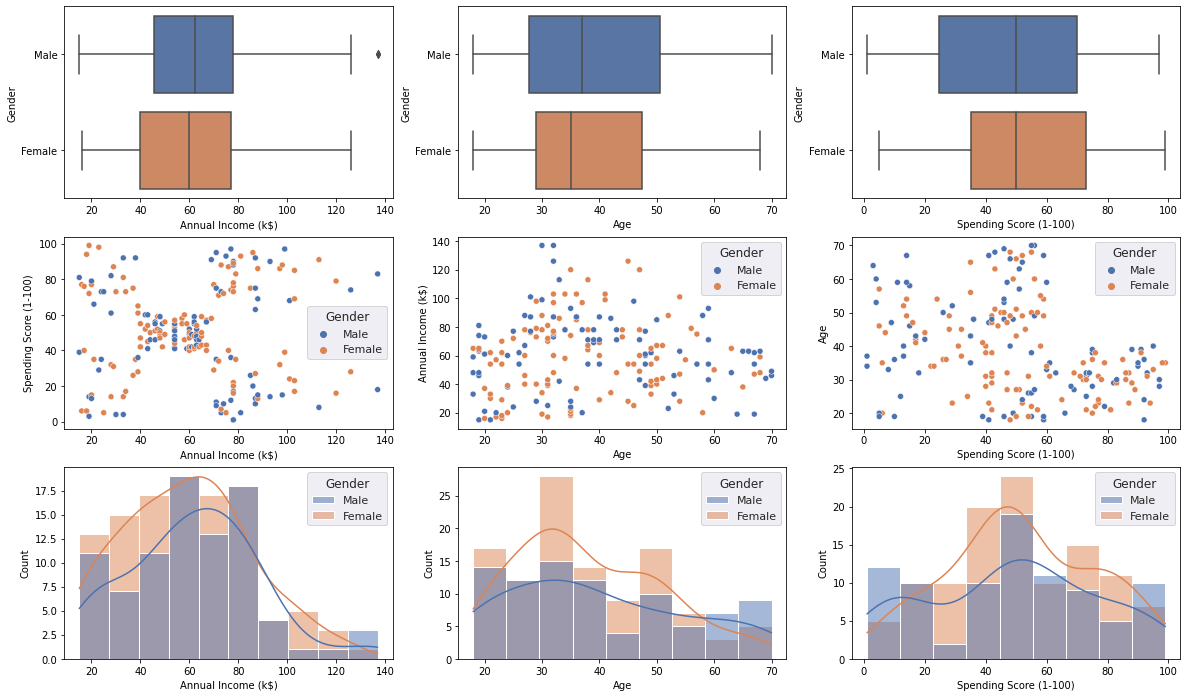

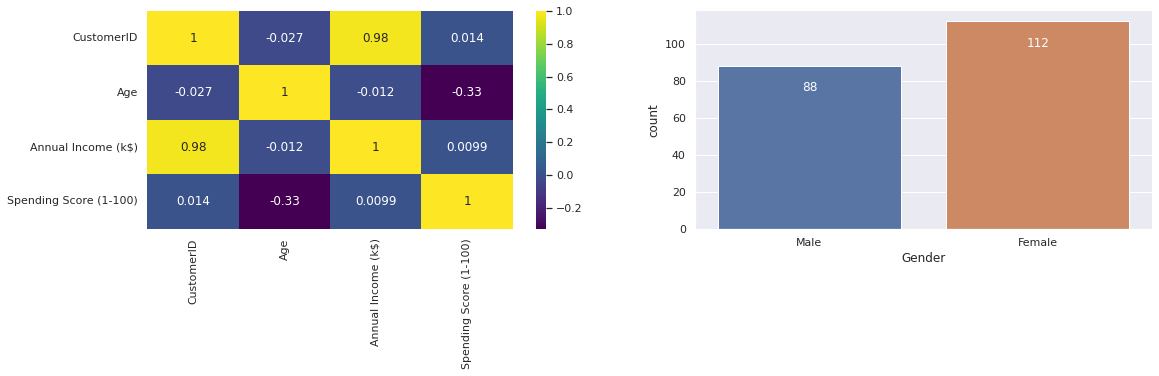

In [5]:
dvn_c.initial_viewing(mall_df, 
                      'Annual Income (k$)', 'Age', 'Gender', 'Spending Score (1-100)')

### Removal outlier / anomallies data-points

In [ ]:
removed_df = dvn_c.anomallies_removed(mall_df, 'Annual Income (k$)')

dvn_c.initial_viewing(removed_df, 
                      'Annual Income (k$)', 'Age', 'Gender', 'Spending Score (1-100)')

### Comments
- We see that ‘Age’ is negatively correlated with ‘Spending Score’.
- ‘Annual Income’ is very less correlated with ‘Age’
- ‘Annual Income’ and ‘Spending Score’ is also very less correlated.
- ‘Gender’ is very less correlated with ‘Spending Score’ but more correlated, when compared to ‘Annual Income’.

### Set-up the clustering-model

In [ ]:
data = dvn_c.scaling_data(removed_df, 'CustomerID', [], 'norm')
data.head()

### Apply K-Means
First one, I assume that we didn't focus on the gender of customers!

Noting that, we will apply KMeans to find the best number of clusters on the **standardizing-dataset**

In [ ]:
dvn_c.clusters_scored(data.drop(columns = ['Gender_is_Female', 'Gender_is_Male']))

- We can see that the optimal numbers of clusters be 4-6, the points that which `Elbow-score` stops decreasing drastically. Likewise, these points the `shilhoutte_scores` are the best. But the best-one must be $6$.

- Now, we will check these 3 clusters values by viewing these clusters-results.

In [ ]:
from sklearn.cluster import KMeans
            
dvn_c.cluster_views(removed_df.drop(columns = ['Gender', 'CustomerID']), 
                    [4,5,6], 
                    'Annual Income (k$)', 'Spending Score (1-100)', 'Age')    

### Verify by classification!

#### Create the new_cluster_label in your dataset

Now, let `n_cluster = 5`

In [ ]:
df_add_label = dvn_c.add_labels(removed_df, ['CustomerID', 'Gender'], 5)
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
                hue = 'clusters', data = df_add_label)
df_add_label.head()

#### Comments
As observed above, the `income` and `spending_score` 

>- `Group 1`: low annual income, low spending score
>- `Group 2`: low annual income, high spending score
>- `Group 3`: intermediate annual income, intermediate spending score
>- `Group 4`: high annual income, high spending score
>- `Group 5`: high annual income, low spending score

#### Apply a simple-classification with `AdaBoost`

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
clf = AdaBoostClassifier()
grid_params = {
              'n_estimators': [100, 150, 200],
              'learning_rate' : [1e-2,1, 1e-1,1e-3]
             }
df = dvn_c.k_Fold_Best_params_show_all_(df_add_label.drop(columns = ['Gender', 'CustomerID']), 
                                         4, clf, grid_params, 
                                         'clusters', x_name = 'Annual Income (k$)',
                                         y_name = 'Spending Score (1-100)', 
                                         show_all = True)

- All the scores is pretty-good!

#### Grouped-viewing by each clusters

- Clusters 0,1,2,3 have a higher proportion of females than males and cluster 4 has an almost equal proportion of both.

In [ ]:
dvn_c.final_market_analytics__type_1_(df_add_label, 'CustomerID', 'Gender')

### Label-naming and Conclusion

1. **Cluster 3**: high annual income, high spending score
The average age is $32,76$ years; predominantly female; Average Annual Income is $85,211$k in dollars; Average Spending Score is $82,105$
2. **Cluster 2**: intermediate annual income, intermediate spending score
The average age is $42,938$ years; predominantly female ($47$); Average Annual Income is $55,088$k in dollars; Average Spending Score is $49,712$
3. **Cluster 1**: low annual income, high spending score
The average age is $25,27$ years; predominantly female; Average Annual Income is $25,727$k in dollars; Average Spending Score is $79,364$
4. **Cluster 5**: low annual income, low spending score
The average age is $45,217$ years; predominantly female; Average Annual Income is $26,304$k in dollars; Average Spending Score is $20,913$
5. **Cluster 4**: high annual income, low spending score
The average age is $40,914$ years; there is an almost equal proportion of males and females; Average Annual Income is $86,343$k in dollars; Average Spending Score is $17,571$.

In [ ]:
df.head()

### Exercise

In [ ]:
customer_df = pd.read_csv("https://raw.githubusercontent.com/Nhan121/Lectures_notes-teaching-in-VN-/master/US-Embassy_DS-course/Class%202/datasets/customer_data.csv")
customer_df.head()

In [ ]:
dvn_c.table_count_null(customer_df)

In [ ]:
%time customer_df['InvoiceDate'] = pd.to_datetime(customer_df['InvoiceDate'])

In [ ]:
dvn_c.table_count_unique(customer_df)

In [ ]:
df = dvn_c.data_duplicate(customer_df)

In [ ]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

observed_cols = ['CustomerID', 'InvoiceNo', 'Country']
dvn_c.viewing_by_country(df, observed_cols)

In [ ]:
dvn_c.view_top(df, 'StockCode', 'InvoiceNo', 'CustomerID', 'quantity', 'InvoiceDate', 10)

- TODO
>- Create the clustering model based on the `quantity`, `unit_price`
>- Give the comments and your explainations

In [ ]:
# Your code here

In [ ]:
# Your code here

In [ ]:
# Your code here